50
TARGET: C:\Users\1821084\Documents\research\python\research\Movies/tanin/target/
COMPARING: C:\Users\1821084\Documents\research\python\research\Movies/tanin/sasuga/
TARGET_FILE: eye_050.jpg
平均値: 102.833514
最小値：41.648649
最大値：169.945946
成功
--------------------------------
TARGET_FILE: eye_051.jpg
平均値: 100.940541
最小値：45.783784
最大値：168.135135
成功
--------------------------------
TARGET_FILE: eye_052.jpg
平均値: 102.236875
最小値：49.781250
最大値：169.937500
成功
--------------------------------
TARGET_FILE: eye_053.jpg
平均値: 111.365625
最小値：61.656250
最大値：179.187500
成功
--------------------------------
TARGET_FILE: eye_054.jpg
平均値: 110.716316
最小値：65.342105
最大値：170.973684
成功
--------------------------------
TARGET_FILE: eye_055.jpg
平均値: 112.522927
最小値：67.585366
最大値：172.682927
成功
--------------------------------
TARGET_FILE: eye_056.jpg
平均値: 112.912105
最小値：63.026316
最大値：179.894737
成功
--------------------------------
TARGET_FILE: eye_057.jpg
平均値: 113.052093
最小値：62.046512
最大値：176.651163
成功
-----------------

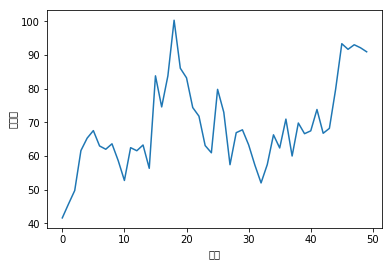

In [12]:
# -*- coding: UTF-8 -*-

import cv2
import os
import matplotlib.pyplot as plt
import csv
import statistics
import math
%matplotlib inline

#入力画像
IMG_DIR = os.path.abspath(os.path.dirname("__file__")) + '/tanin/target/'
#比較画像
TARGET_IMG_DIR = os.path.abspath(os.path.dirname("__file__")) + '/tanin/sasuga/'

files = os.listdir(IMG_DIR)
for file in files:
    if file == '.DS_Store':
        continue
Comparison_files = os.listdir(TARGET_IMG_DIR)
for file in files:
    if file == '.DS_Store':
        continue
print(len(Comparison_files))
count = len(Comparison_files)

t = 0

f = 50

bf = cv2.BFMatcher(cv2.NORM_HAMMING)

# ORBとAKAZEは特徴点や特徴量を抽出するアルゴリズム
# コメントアウトを調節することによりどちらでも行える

detector = cv2.AKAZE_create()

#目のサイズ
IMG_SIZE = (600, 150)
#IMG_SIZE = (500, 150)
#IMG_SIZE = (600, 150)
#顔のサイズ
#IMG_SIZE = (400, 400)

#retを入れる配列
r = []
#最小値を入れる配列
m = []

# f=open('driverfeel.csv','a')
# f.close()

#TARGET_IMG_DIRは比較する画像が入っているディレクトリ
print("TARGET: %s"%(IMG_DIR))

#TARGET_IMG_DIRは比較する画像が入っているディレクトリ
print("COMPARING: %s"%(TARGET_IMG_DIR))

#閾値(目)
th = 100

c = 0
n = 0

while t < f:
    i = 0
    dsum = 0
    min = 10000
    max = 0
    TARGET_FILE = files[t]
    target_img_path = IMG_DIR + TARGET_FILE
    target_img = cv2.imread(target_img_path)
    target_img = cv2.cvtColor(target_img, cv2.COLOR_BGR2GRAY)
    target_img = cv2.resize(target_img, IMG_SIZE)

#     cv2.imshow('test', target_img)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
    # ターゲットの写真の特徴点を取得する
    (target_kp, target_des) = detector.detectAndCompute(target_img, None)
    #(target_kp, target_des) = detector.detectAndCompute(img_gray, None)

    print('TARGET_FILE: %s' % (TARGET_FILE))

    #comparing_img_path = IMG_DIR + file
    #count = len(files)

    #print(Comparison_files[100])

    #print(count)

    #比較する画像の数だけループ
    while count > i:
        try:
            comparing_img_path = TARGET_IMG_DIR + Comparison_files[i]
            comparing_img = cv2.imread(comparing_img_path)
            comparing_img = cv2.cvtColor(comparing_img, cv2.COLOR_BGR2GRAY)
            #comparing_img = cv2.resize(img_gray, IMG_SIZE)
            #comparing_img = cv2.cvtColor(comparing_img , cv2.COLOR_BGR2RGB)
            comparing_img = cv2.resize(comparing_img, IMG_SIZE)
            # 比較する写真の特徴点を取得する
            comparing_kp, comparing_des = detector.detectAndCompute(comparing_img, None)
            #if (comparing_des=)もしNoneだったら
            # BFMatcherで総当たりマッチングを行う
            matches = bf.match(target_des, comparing_des)
            #特徴量の距離を出し、平均を取る
            dist = [m.distance for m in matches]
            ret = sum(dist) / len(dist)
            if min > ret:
                min = ret
            if max < ret:
                max = ret
            dsum += ret
            r += [ret]
            #print(files[i], ret)
        except cv2.error:
            # cv2がエラーを吐いた場合の処理
            ret = 100000
        i += 1
    
    print("平均値: %f"%(dsum/count))
    print("最小値：%f"% (min))
    print("最大値：%f"% (max))
    #print("最頻値：%f"%(statistics.mode(r)))
    r = []
    if (min < th):
        print("成功")
        c += 1
    else:
        print("失敗")
        n += 1
    print("--------------------------------")
    t += 1
    m += [min]
#     writer=csv.writer(f)
#     writer.writerow([min]) #加えたい値を入れるここではminを入れた

# Plot histogram
x = list(range(len(m)))
#print(len(list))
plt.xlabel("回数")
plt.ylabel("最小値")
plt.plot(x, m)
#print(statistics.mode(m))
print("成功数: %d"%(c))
print("失敗数: %d"%(n))